In [ ]:
import requests
import pandas as pd
import seaborn as sns
%matplotlib inline

# Survey results

### Pull data from Typeform API

In [2]:
url = 'https://api.typeform.com/v1/form/qahGnp?key=APIKEY&completed=true'
typeform_json = requests.get(url).json()
#typeform_json

### Transform data

In [3]:
typeform_responses = [(x['answers']['list_19763925_choice'],x['answers']['list_19764069_choice'],
                       x['answers']['list_19801663_choice']) for x in typeform_json['responses']]
#typeform_responses

In [4]:
df = pd.DataFrame(typeform_responses, columns=['focus', 'level', 'frequency'])
df.head(3)

,focus,level,frequency
0,technical perspective,newcomer,4 weeks
1,technical perspective,experimenter,12 weeks
2,technical perspective,newcomer,4 weeks


### Plot data

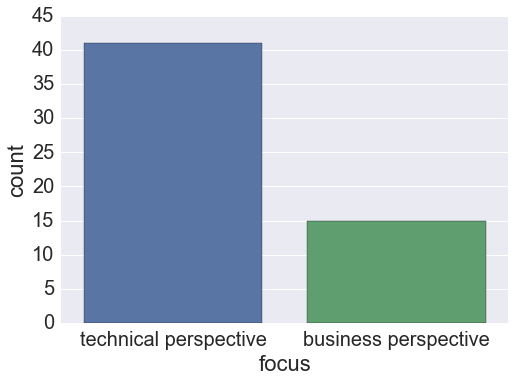

In [5]:
sns.set(font_scale=2)
sns.countplot(x='focus', data=df)

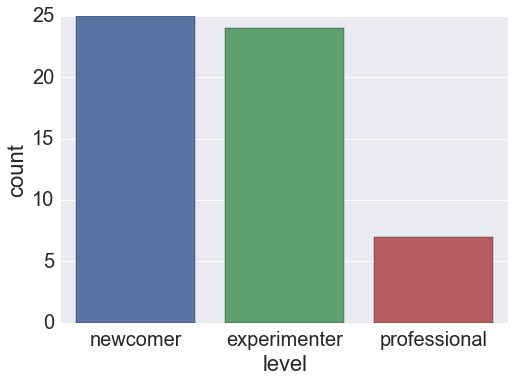

In [6]:
sns.countplot(x='level', data=df)

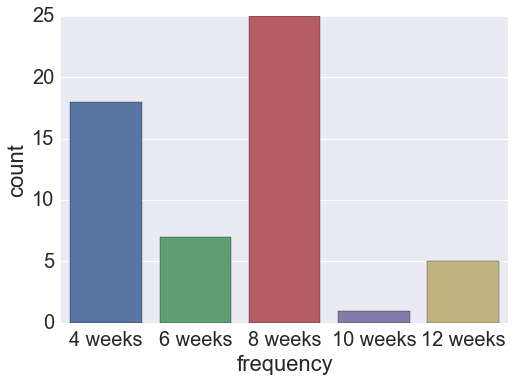

In [7]:
sns.countplot(x='frequency', order=['4 weeks', '6 weeks', '8 weeks', '10 weeks', '12 weeks'], data=df)

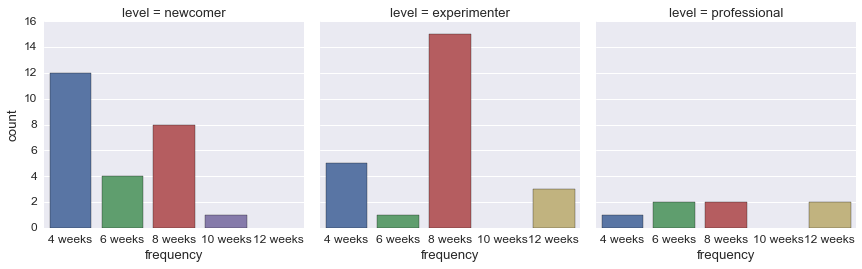

In [8]:
sns.set(font_scale=1.2)
sns.factorplot('frequency', data=df, kind='count', col='level', order=['4 weeks', '6 weeks', '8 weeks', '10 weeks', '12 weeks'])